## Q2: (100 point) 
- Linear regression. Please follow the instructions of Q2 to fulfill the demo code, then execute linear regression program and show related results.

### Instruction for Linear Regression


#### Background
You are given 100 two dimension points that roughly around a line $Y = mX + b$. 
You need to find the slope $m$ and y-intercept $b$ by using gradient descent.


#### Linear Regression Algorithm
1. Load the data point set;
2. Initialize parameters of line;
3. Calculate the MSE;
4. Compute gradients of all parameters;
5. Update parameters by using gradient descent;
6. Repeat step3 to step5 for n iterations.
7. Draw the line (The demo figure is shown as follows)

![title](./linear_regression_demo.eps)


#### Task
1. In the 'step_gradient_update' function, compute the correct negative gradients of 'b'. (20 points)
2. compute the correct negative gradient of 'm'. (20 points)
3. Update 'b' parameter by using gradient descent. (30 points)
4. Update 'm' parameter by using gradient descent. (30 points)


#### System Requirements
We require you use Python 3.x and related packages such as numpy and matplotlib.



#### Reference

https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png

Starting gradient descent at b = 0.00, m = 0.00, error = 556510.78
Running...
After 1000 iterations b = 0.09, m = 1.48, error = 11261.48


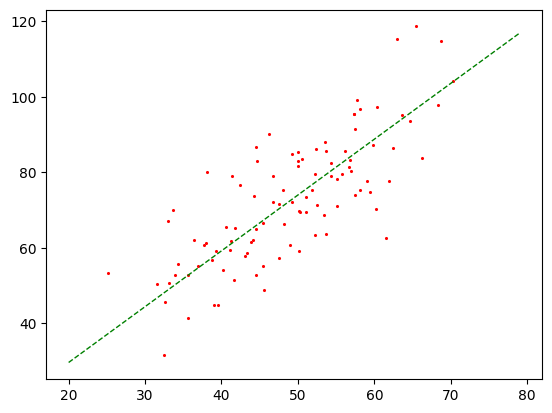

In [1]:
from numpy import *
import matplotlib.pyplot as plt


def mean_squared_error(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError

# Input: current parameters m and b; data points, learning rate;
# Output: Updated new parameters m and b by using gradient descent.
def step_gradient_update(b, m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    
    N = len(points)
    
    # Caculate b gradient
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient = b_gradient + (y - m * x - b)
        m_gradient = m_gradient + x * (y - m * x - b) 
        
    b_gradient = (-2) * b_gradient/N
    m_gradient = (-2) * m_gradient/N
      
    # update b and m
    new_b = b - (learning_rate * b_gradient)
    new_m = m - (learning_rate * m_gradient)
    
    return new_b, new_m


# Draw the line
def draw_plot(points, b, m):
    x_0 = arange(20, 80)
    plt.plot(x_0, m * x_0 + b, linestyle="--", color="g", linewidth=1.0)
    x = points[:, 0]
    y = points[:, 1]
    plt.scatter(x, y, s=5, c='r', alpha=1.0, lw=0)
    plt.savefig("linear_regression.eps", dpi=120)


def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    b = 0 
    m = 0 
    num_iterations = 1000
    print("Starting gradient descent at b = {:.2f}, m = {:.2f}, error = {:.2f}".format(b, m, mean_squared_error(b, m, points)))
    print("Running...")
    for i in range(num_iterations):
        b, m = step_gradient_update(b, m, array(points), learning_rate)
    print("After {:d} iterations b = {:.2f}, m = {:.2f}, error = {:.2f}".format(num_iterations, b, m, mean_squared_error(b, m, points)))
    draw_plot(points,b,m)


if __name__ == '__main__':
    run()